# Analysis of Obstacle Environment Training Results
This notebook analyzes the training performance of the PPO agent in the Grid World environment with obstacles. It visualizes the learning curves for reward and episode length based on data from multiple training runs.


### 1. Import Necessary Libraries
We import the libraries needed for data loading, file searching, and plotting.


In [1]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt


### 2. Find and Load Data from CSV Files
We search for all `progress.csv` files in directories matching the pattern `log/ppo_obstacles_20_40_*` and combine them into a single DataFrame.


In [2]:
# Find all progress.csv files
path_pattern = 'log/ppo_obstacles_20_40_*/progress.csv'
csv_files = glob.glob(path_pattern)

# Read and concatenate all CSV files into a single DataFrame
df_list = [pd.read_csv(file) for file in csv_files]
all_data = pd.concat(df_list, ignore_index=True)

print(f"Found and loaded {len(df_list)} files.")
print("Data head:")
print(all_data.head())


Found and loaded 5 files.
Data head:
   time/total_timesteps  time/fps  rollout/ep_rew_mean  time/iterations  \
0                  2048      1300           -26.417810                1   
1                  4096       975           -20.810500                2   
2                  6144       865            -9.077366                3   
3                  8192       835            -0.303529                4   
4                 10240       831             4.834722                5   

   time/time_elapsed  rollout/ep_len_mean  train/learning_rate  \
0                  1           341.600000                  NaN   
1                  4           305.307692               0.0003   
2                  7           230.923077               0.0003   
3                  9           163.700000               0.0003   
4                 12           121.726190               0.0003   

   train/policy_gradient_loss  train/entropy_loss  train/approx_kl  \
0                         NaN                

### 3. Plot Time Steps vs. Mean Reward
This plot shows the `rollout/ep_rew_mean` against `time/total_timesteps`. Seaborn's `lineplot` automatically aggregates the data to show the mean trend and a confidence interval representing the variance across runs.


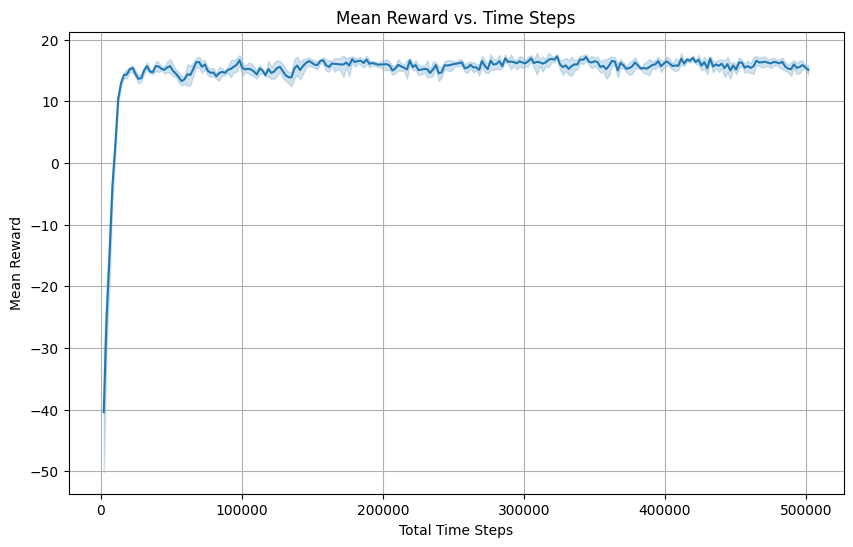

In [3]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=all_data, x='time/total_timesteps', y='rollout/ep_rew_mean')
plt.title('Mean Reward vs. Time Steps')
plt.xlabel('Total Time Steps')
plt.ylabel('Mean Reward')
plt.grid(True)
plt.show()


### 4. Plot Time Steps vs. Mean Episode Length
This plot shows the `rollout/ep_len_mean` against `time/total_timesteps`, illustrating how the average episode length changes as the agent learns.


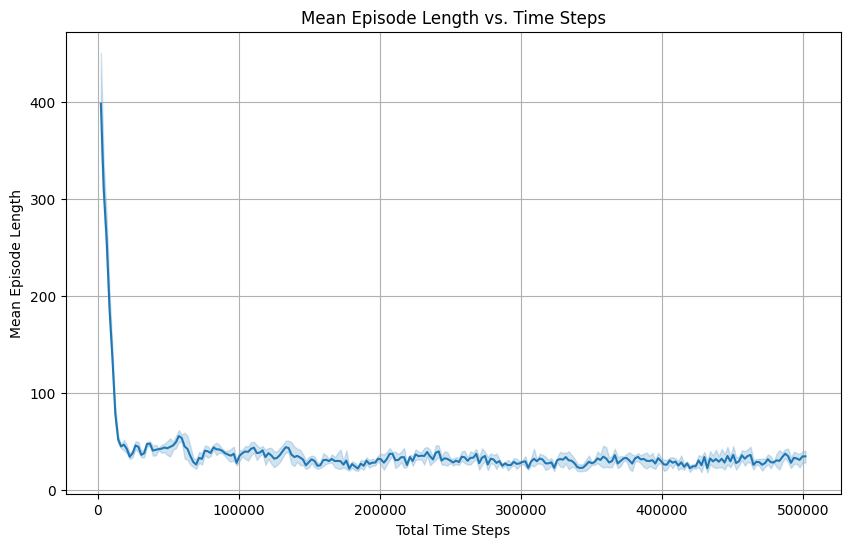

In [4]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=all_data, x='time/total_timesteps', y='rollout/ep_len_mean')
plt.title('Mean Episode Length vs. Time Steps')
plt.xlabel('Total Time Steps')
plt.ylabel('Mean Episode Length')
plt.grid(True)
plt.show()
